# PROYECTO ANALISIS DE DATOS
## Accidentes Eléctricos en Colombia  entre 2010-2019

### Integrantes:
* Jou Jaramillo Uribe
* Steven Oviedo Herrera

## 1. Entendimiento del negocio

Esta etapa se refiere a la predicción de accidentes anuales en Colombia de origen eléctrico. Para esto se realiza una comprensión y análisis de los accidentes ocurridos entre los años 2010 y 2019, lo cual nos darán una idea de la frecuencia con la que ocurren este tipo de eventos en el país.

a)	Establecer objetivos
* La investigación acarrea el objetivo de hacer un reconocimiento mensual de los incidentes eléctricos ocurridos entre 2010 y 2019 para predecir e identificar patrones de dichos eventos para contar con información útil a la hora de crear medidas de seguridad activas y pasivas a los operadores de red por parte de empresas del sector, con lo cual se busca minimizar la frecuencia de ocurrencia de estos. 


b)	Evaluar la situación
* El número de accidentes en el país en el sector mencionado, tiene mucho que ver con la frecuencia en que se manipulan estos equipos que necesariamente necesiten una actualización o mantenimiento, esto depende mucho del sector del país en que se encuentre, como por ejemplo los equipos en sectores que estén a nivel del mar requerirán manteamientos más contantes. 

* Por otro lado, también tiene una gran influencia en los incidentes ocurridos lo expuestos que estén estos puntos eléctricos para la sociedad, lo que abre la posibilidad de que personas mal intencionadas o incluso menores de edad que desconocen la gravedad y el peligro que representa someterse a este tipo de sitios acaben en un evento mortal

c)	Preguntas que el modelo responderá
* ¿Se puede realmente predecir el número de eventos riesgosos del sector eléctrico de un determinado número de meses siguientes con la naturaleza de los datos seleccionados, teniendo en cuanta que estos fueron extraídos el periodo 2010-2019?
* ¿El modelo obtenido solo sirve para accidentes eléctricos o podría ser escalado para otras situaciones de sectores industriales distintos (automovilísticos, constructoras, robos, aseguradoras, fenómenos naturales, etc.)?
* ¿Qué porcentaje de datos deben ser asignados para entrenamiento y prueba con el finde obtener un mejor modelo predictivo?
* ¿Qué tan viable pueden ser las predicciones obtenidas y que porcentaje de confiabilidad representan estas?

 d)	Riesgos
* Se espera que los datos obtenidos sean confiables debido a que fueron extraídos de fuentes oficiales del gobierno colombiano y que adicionalmente, el hecho de que sean abiertos al público conlleva a que muchas personas puedan dar su retroalimentación con respeto a la opinión que tengan de lo útil que les ha sido toda la información publicada. Pero esto no quiere decir que no se realizará una correcta preparación del dato y un pre-estudio, analizando el contenido del dataset y verificar la coherencia de estos.
* Aun así, sabemos que existe la posibilidad de toparnos con errores humano debido a que se trata de un conjunto de datos extenso por lo que hay una gran probabilidad de que este esté afectado de cierta manera por malas digitaciones, entre otros. 


## 2. ANALISIS EXPLORATORIO DE LOS DATOS:

In [110]:
import pandas as pd
import numpy as np

##### Cargar los datos:

In [111]:
data=pd.read_csv(r'Informe_de_Accidentes_Electricos.csv')
data.shape

(3168, 23)

In [112]:
data.head()

,IDENTIFICADOR_EMPRESA,EMPRESA,FECHA,ANIO,TRIMESTRE,HORA,COD_DANE,DEPARTAMENTO,MUNICIPIO,CENTRO_POBLADO,...,TIPO_IDENTIFICACION,VINCULADO_EMPRESA,TIPO_VINCULACION,GRADO_ESCOLARIDAD,TIEMPO_VINCULACION,SECCION_EMPRESA,TIPO_LESION,ORIGEN_ACCIDENTE,CAUSA_ACCIDENTE,MEDIDAS
0,3370.0,EMPRESA DE ENERGIA DE CASANARE SA ESP,09/05/2015,2015,3,09:15,85263000,CASANARE,PORE,PORE,...,C.C.,S,CONTRATISTA,TÉCNICO,6,Operación - Distribución,Quemaduras,Fallas de operación,Contacto Directo,Instalacion correcta puesta a tierra Reforzar ...
1,23442.0,COMPAÑIA ENERGETICA DE OCCIDENTE S.A.S. E.S.P.,11/27/2014,2014,4,11:40,19698020,CAUCA,SANTANDER DE QUILICHAO,QUINAMAYO,...,C.C.,S,CONTRATISTA,BÁSICA PRIMARIA,2,Otro - Distribución,Muerte,Violación de distancias de seguridad,Contacto Indirecto,Realizar un programa de capacitacion de identi...
2,2249.0,ELECTRIFICADORA DEL CARIBE S.A. E.S.P.,10/02/2015,2015,4,15:30,44001000,LA GUAJIRA,RIOHACHA,RIOHACHA,...,OTRO,N,NO APLICA,OTRO,11111,Mantenimiento - Distribución,Otra,Falta conductor puesta a tierra,Equipo defectuoso,SE REVISO PUESTA TIERRA DE LA VIVIENDA
3,2249.0,ELECTRIFICADORA DEL CARIBE S.A. E.S.P.,08/12/2012,2012,4,15:00,47660000,MAGDALENA,SABANAS DE SAN ANGEL,SAN ANGEL,...,C.C.,N,NO APLICA,BÁSICA PRIMARIA,11111,Mantenimiento - Distribución,Quemaduras,Accidentes externos,Contacto Indirecto,Se desconecto el ramal como medida de segurida...
4,2249.0,ELECTRIFICADORA DEL CARIBE S.A. E.S.P.,11/04/2016,2017,4,20:00,44279000,LA GUAJIRA,FONSECA,FONSECA,...,N.N.,N,NO APLICA,BÁSICA PRIMARIA,11111,Mantenimiento - Distribución,Quemaduras,Fallas de aislamiento,Contacto Indirecto,Se corto el tv cable que energizo la retenida ...


In [113]:
data.describe()

,IDENTIFICADOR_EMPRESA,ANIO,TRIMESTRE,COD_DANE,EDAD,TIEMPO_VINCULACION
count,3168.000000,3168.000000,3168.000000,3.168000e+03,3168.000000,3168.000000
mean,3165.964015,2015.402778,2.651199,3.630353e+07,30.848169,9238.954545
std,5833.239490,2.867237,1.095615,2.769699e+07,22.945206,4145.502366
min,480.000000,2010.000000,1.000000,0.000000e+00,1.000000,1.000000
25%,603.000000,2013.000000,2.000000,1.100100e+07,14.000000,11111.000000
50%,2249.000000,2016.000000,3.000000,2.341703e+07,30.000000,11111.000000
75%,2249.000000,2018.000000,4.000000,6.617000e+07,43.000000,11111.000000
max,44278.000000,2022.000000,4.000000,9.520000e+07,99.000000,11111.000000


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   IDENTIFICADOR_EMPRESA  3168 non-null   float64
 1   EMPRESA                3168 non-null   object 
 2   FECHA                  3168 non-null   object 
 3   ANIO                   3168 non-null   int64  
 4   TRIMESTRE              3168 non-null   int64  
 5   HORA                   3168 non-null   object 
 6   COD_DANE               3168 non-null   int64  
 7   DEPARTAMENTO           3145 non-null   object 
 8   MUNICIPIO              3145 non-null   object 
 9   CENTRO_POBLADO         3145 non-null   object 
 10  UBICACION              3168 non-null   object 
 11  SEXO                   3168 non-null   object 
 12  EDAD                   3168 non-null   int64  
 13  TIPO_IDENTIFICACION    3168 non-null   object 
 14  VINCULADO_EMPRESA      3168 non-null   object 
 15  TIPO

* Contamos con mas de 20 variables, lo cual la mayoria de estas no serán de nuestro interés para el desarrollo del proyecto.

## 3. PREPARACIÓN DELOS DATOS:

In [115]:
data = data[['FECHA','DEPARTAMENTO']]
data

,FECHA,DEPARTAMENTO
0,09/05/2015,CASANARE
1,11/27/2014,CAUCA
2,10/02/2015,LA GUAJIRA
3,08/12/2012,MAGDALENA
4,11/04/2016,LA GUAJIRA
...,...,...
3163,10/01/2014,ANTIOQUIA
3164,12/17/2013,CHOCÓ
3165,06/30/2020,NARIÑO
3166,09/28/2014,BOLÍVAR


In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   FECHA         3168 non-null   object
 1   DEPARTAMENTO  3145 non-null   object
dtypes: object(2)
memory usage: 49.6+ KB


In [117]:
data.describe()

,FECHA,DEPARTAMENTO
count,3168,3145
unique,1952,28
top,08/12/2017,ATLÁNTICO
freq,9,405


* Aplicamos un filtro y nos quedmaos con las variables que nos ayudarán y serán de gran importancia para desarrollar el proyecto.

In [118]:
data['DEPARTAMENTO'].value_counts()

ATLÁNTICO             405
VALLE DEL CAUCA       380
ANTIOQUIA             312
BOLÍVAR               309
MAGDALENA             197
CÓRDOBA               140
BOGOTÁ, D.C.          128
CESAR                 119
SANTANDER             109
RISARALDA             101
PUTUMAYO               92
LA GUAJIRA             87
SUCRE                  86
CAUCA                  84
CALDAS                 83
NARIÑO                 74
TOLIMA                 69
HUILA                  59
NORTE DE SANTANDER     53
META                   51
CHOCÓ                  50
QUINDÍO                49
CUNDINAMARCA           41
BOYACÁ                 30
CAQUETÁ                20
CASANARE               13
GUAVIARE                3
ARAUCA                  1
Name: DEPARTAMENTO, dtype: int64

In [119]:
data['DEPARTAMENTO'].value_counts().count()

28

In [120]:
data.apply(lambda x: x['DEPARTAMENTO'] == 'BOGOTÁ, D.C.', axis=1).sum()

128

In [121]:
data['DEPARTAMENTO'].replace({"BOGOTÁ, D.C.": "CUNDINAMARCA"}, inplace = True)
data['DEPARTAMENTO'].value_counts()

ATLÁNTICO             405
VALLE DEL CAUCA       380
ANTIOQUIA             312
BOLÍVAR               309
MAGDALENA             197
CUNDINAMARCA          169
CÓRDOBA               140
CESAR                 119
SANTANDER             109
RISARALDA             101
PUTUMAYO               92
LA GUAJIRA             87
SUCRE                  86
CAUCA                  84
CALDAS                 83
NARIÑO                 74
TOLIMA                 69
HUILA                  59
NORTE DE SANTANDER     53
META                   51
CHOCÓ                  50
QUINDÍO                49
BOYACÁ                 30
CAQUETÁ                20
CASANARE               13
GUAVIARE                3
ARAUCA                  1
Name: DEPARTAMENTO, dtype: int64

In [122]:
data["FECHA"].count()

3168

In [123]:
data.drop(data[data['DEPARTAMENTO'] == "GUAVIARE"].index, inplace = True)
data.drop(data[data['DEPARTAMENTO'] == "ARAUCA"].index, inplace = True)

data["FECHA"].count()

3164

In [124]:
data['DEPARTAMENTO'].value_counts()

ATLÁNTICO             405
VALLE DEL CAUCA       380
ANTIOQUIA             312
BOLÍVAR               309
MAGDALENA             197
CUNDINAMARCA          169
CÓRDOBA               140
CESAR                 119
SANTANDER             109
RISARALDA             101
PUTUMAYO               92
LA GUAJIRA             87
SUCRE                  86
CAUCA                  84
CALDAS                 83
NARIÑO                 74
TOLIMA                 69
HUILA                  59
NORTE DE SANTANDER     53
META                   51
CHOCÓ                  50
QUINDÍO                49
BOYACÁ                 30
CAQUETÁ                20
CASANARE               13
Name: DEPARTAMENTO, dtype: int64

#### Se han excluido algunos departamentos por falta de información, estos son:
* Amazonas
* Guainía
* San andrés y providencia
* Vaupez
* Vichada
* Guaviare
* Arauca

In [125]:
data['FECHA']=pd.to_datetime(data['FECHA'], infer_datetime_format=True, format="%Y/%m/%d")
data.head()

,FECHA,DEPARTAMENTO
0,2015-09-05,CASANARE
1,2014-11-27,CAUCA
2,2015-10-02,LA GUAJIRA
3,2012-08-12,MAGDALENA
4,2016-11-04,LA GUAJIRA


In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3164 entries, 0 to 3167
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   FECHA         3164 non-null   datetime64[ns]
 1   DEPARTAMENTO  3141 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 74.2+ KB


In [127]:
data

,FECHA,DEPARTAMENTO
0,2015-09-05,CASANARE
1,2014-11-27,CAUCA
2,2015-10-02,LA GUAJIRA
3,2012-08-12,MAGDALENA
4,2016-11-04,LA GUAJIRA
...,...,...
3163,2014-10-01,ANTIOQUIA
3164,2013-12-17,CHOCÓ
3165,2020-06-30,NARIÑO
3166,2014-09-28,BOLÍVAR


In [128]:
data = data.sort_values(by='FECHA')
data.drop([953], axis=0, inplace=True)
data.drop([1061], axis=0, inplace=True)
data.drop([698], axis=0, inplace=True)
data.reset_index(drop=True, inplace= True)
data = data.drop(data.index[2979:3161])
data = data.drop(data.index[0:6])
data = data[data['DEPARTAMENTO'].notna()]
data.to_csv('depts.csv')
data

,FECHA,DEPARTAMENTO
6,2010-07-13,LA GUAJIRA
7,2010-07-13,RISARALDA
8,2010-07-13,ANTIOQUIA
9,2010-07-13,CÓRDOBA
10,2010-07-14,TOLIMA
...,...,...
2974,2019-10-26,MAGDALENA
2975,2019-10-28,BOLÍVAR
2976,2019-10-28,ATLÁNTICO
2977,2019-10-29,SUCRE


* Se eliminaron algunos registros debido a que no estaban dentro del rango de tiempo en el que vamos hacer enfoque.

In [129]:
data["DEPARTAMENTO"] = 1
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2950 entries, 6 to 2978
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   FECHA         2950 non-null   datetime64[ns]
 1   DEPARTAMENTO  2950 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 69.1 KB


In [130]:
data = data.rename(columns={'DEPARTAMENTO':'No. Accidentes'})
data=data.set_index(['FECHA'])
data = data.resample('M').sum()
data.to_csv('numeros.csv')
data

,No. Accidentes
FECHA,
2010-07-31,13
2010-08-31,19
2010-09-30,23
2010-10-31,18
2010-11-30,19
...,...
2019-06-30,49
2019-07-31,30
2019-08-31,31


#### Dejamos preparados nuestros datos correctamente para comenzar a manipularlos y buscar el mejor modelo.

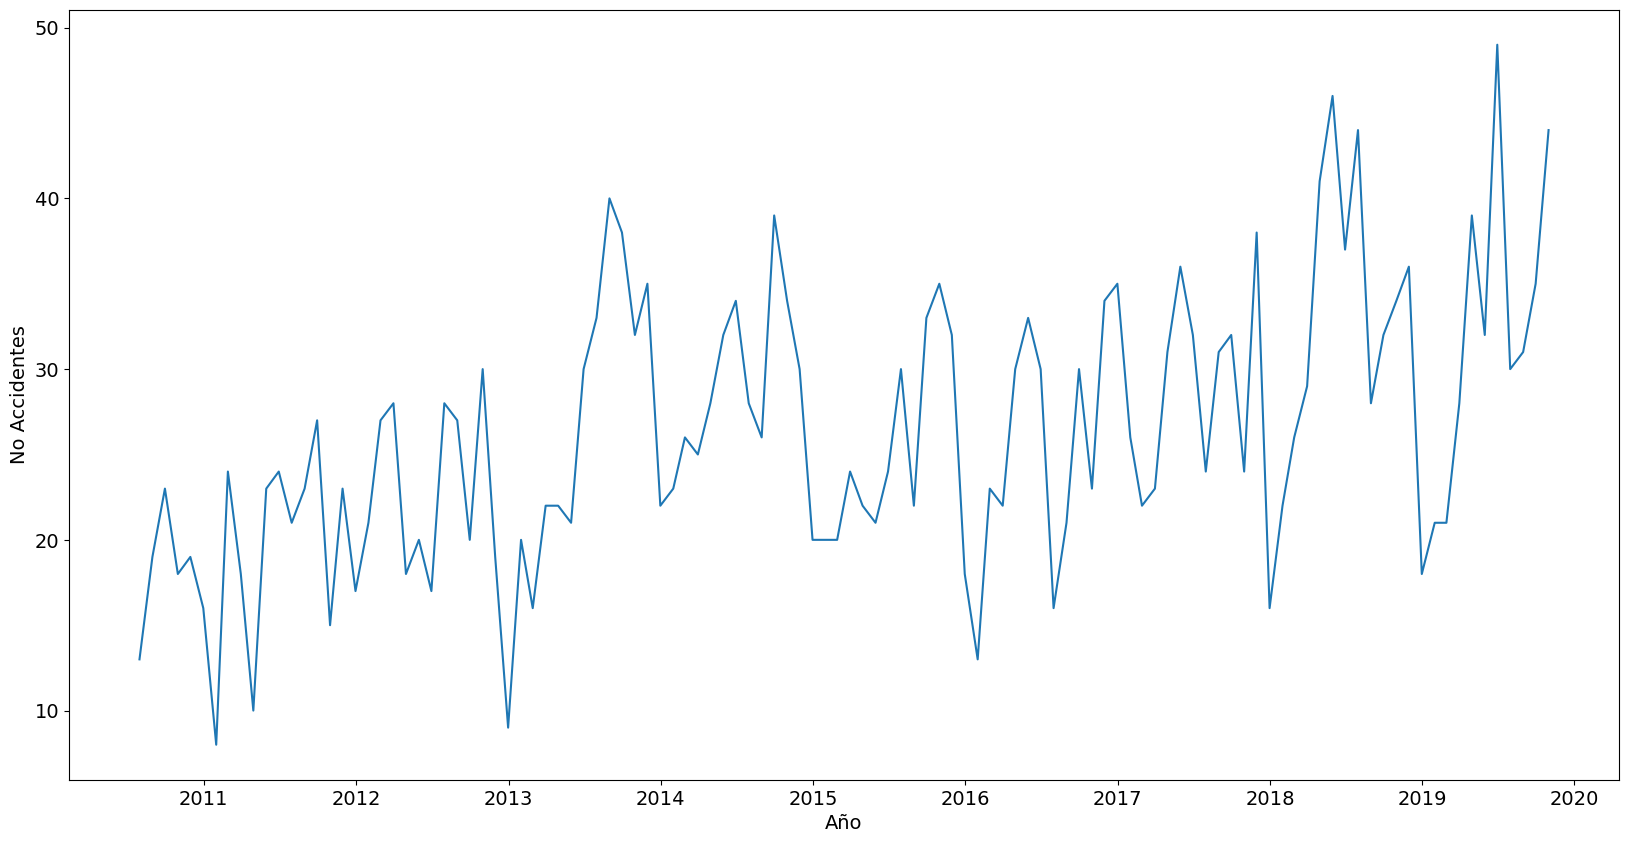

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
plt.rcParams.update({'font.size': 14})
warnings.filterwarnings('ignore')
plt.figure(figsize=(20,10))
plt.xlabel("Año")
plt.ylabel("No Accidentes")
plt.plot(data)

In [132]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(data['No. Accidentes'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic           -1.329460
p-value                   0.615589
Lags Used                11.000000
No. of Obs              100.000000
Critical Value (1%)      -3.497501
Critical Value (5%)      -2.890906
Critical Value (10%)     -2.582435
dtype: float64


#### No se obtiene un p-value muy cercano a cero, algo que nos indica que no se tiene una serie del todo estacionaria. Es por esto que se procede a realizar un diferencial y comprobar nuevamente.

In [133]:
### Llevar la serie a diferencias
diff_data = data.diff().dropna()
diff_data

,No. Accidentes
FECHA,
2010-08-31,6.0
2010-09-30,4.0
2010-10-31,-5.0
2010-11-30,1.0
2010-12-31,-3.0
...,...
2019-06-30,17.0
2019-07-31,-19.0
2019-08-31,1.0


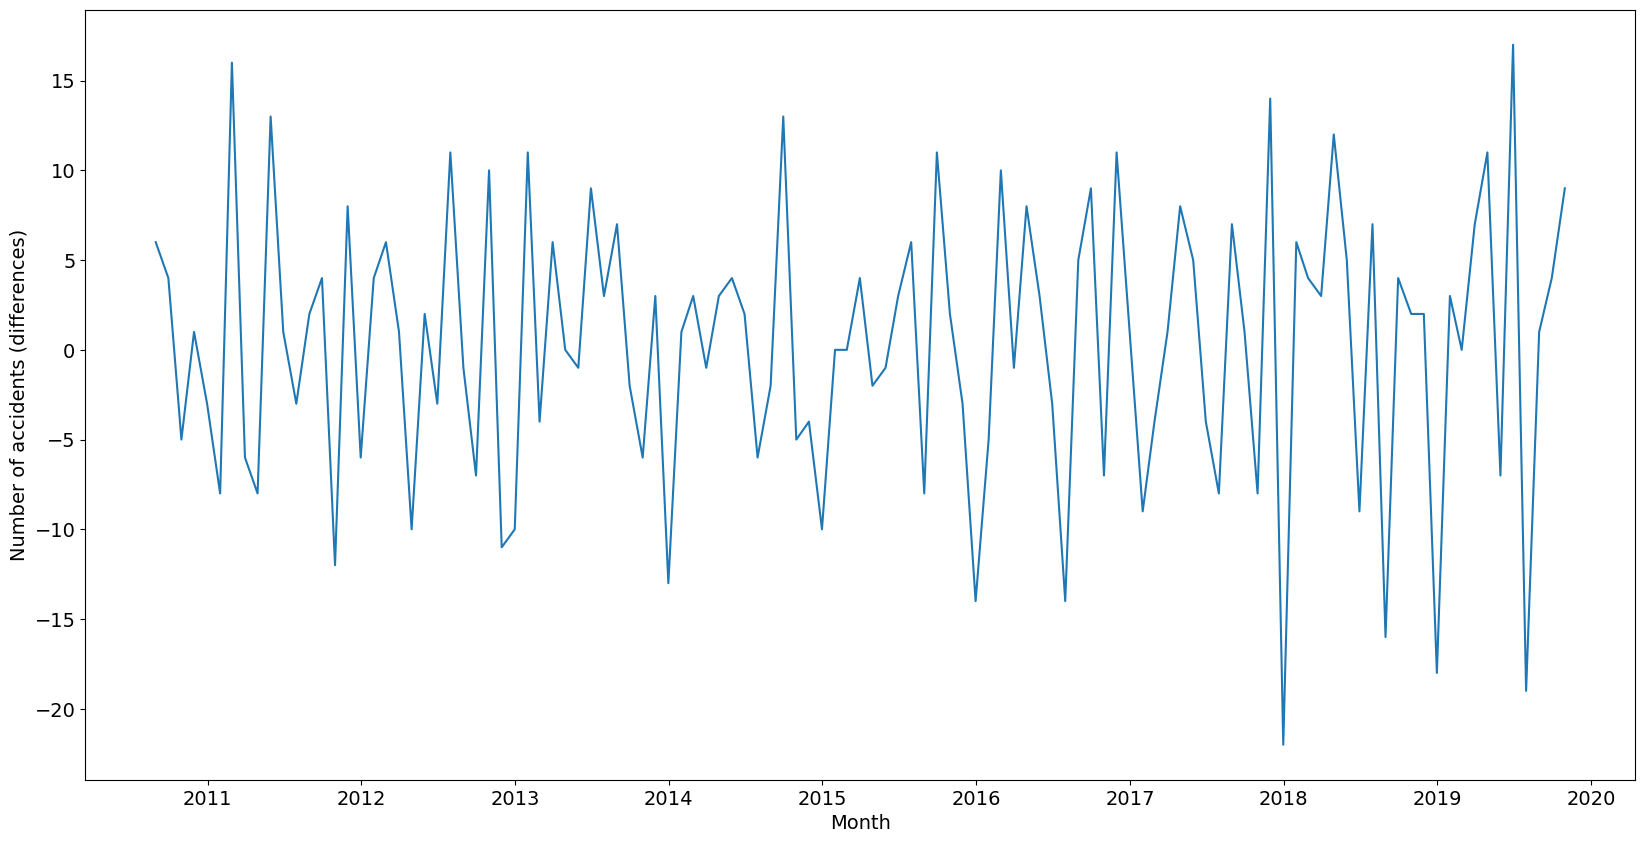

In [134]:
plt.figure(figsize=(20,10))
plt.xlabel("Month")
plt.ylabel("Number of accidents (differences)")
plt.plot(diff_data)

In [135]:
print('Dickey-Fuller Test: ')
dftest=adfuller(diff_data['No. Accidentes'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic         -7.099280e+00
p-value                 4.209127e-10
Lags Used               1.000000e+01
No. of Obs              1.000000e+02
Critical Value (1%)    -3.497501e+00
Critical Value (5%)    -2.890906e+00
Critical Value (10%)   -2.582435e+00
dtype: float64


#### Ahora si podemos decir que tenemos un serie estacionaria con una confiabilidad del 99%

In [136]:
# Dividir en conjuntos de entrenamiento (train) y prueba (test)
X = data.copy()
size = int(len(X) * 0.9)
train, test = X[0:size], X[size:len(X)]

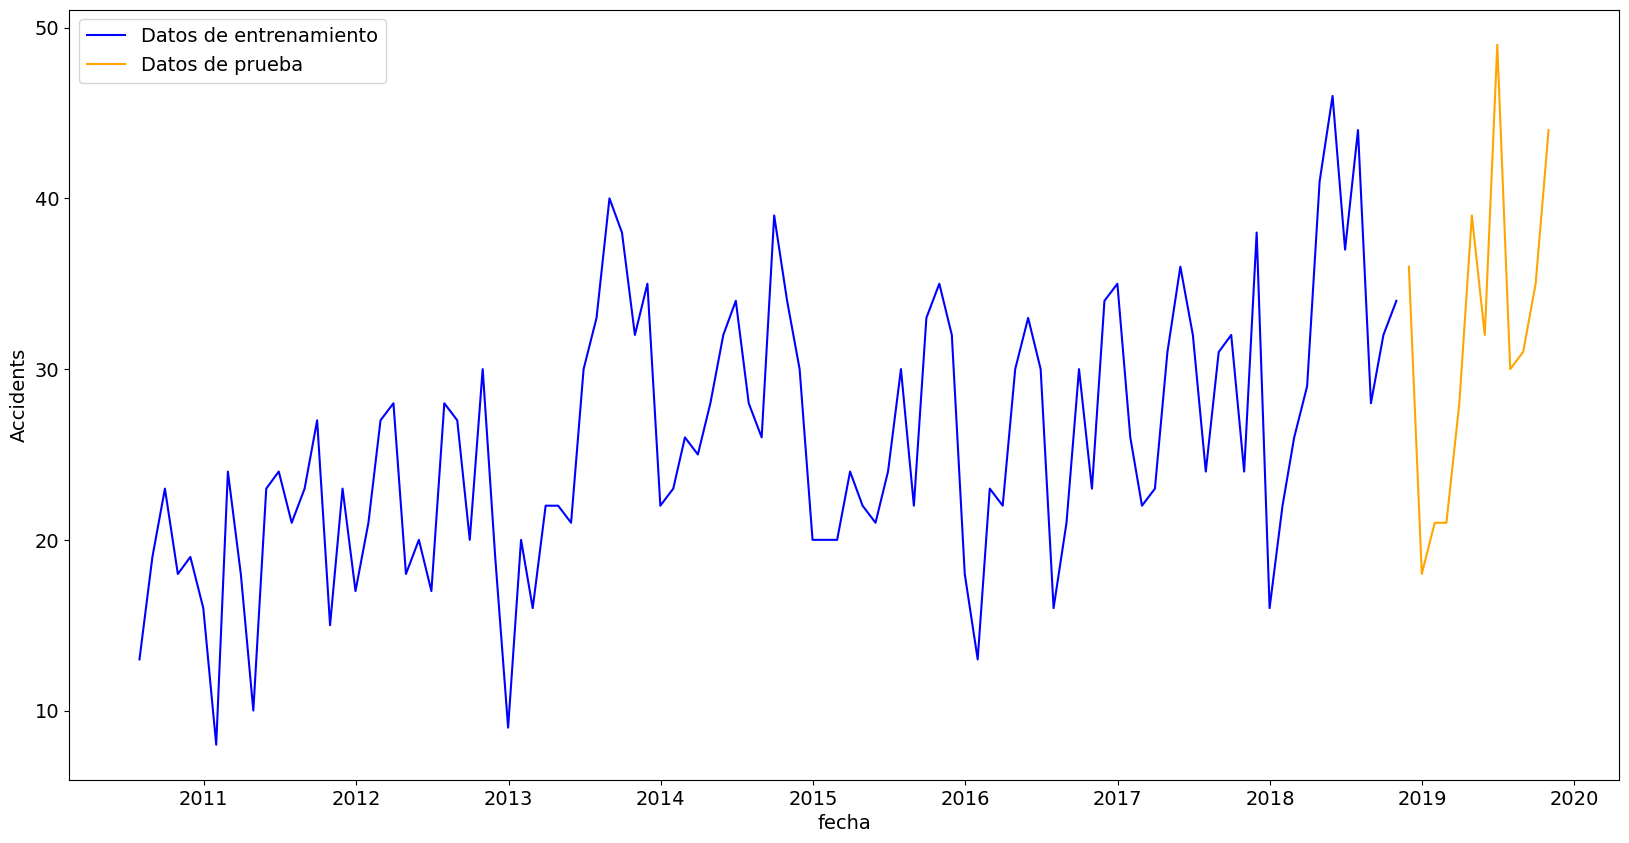

In [137]:
plt.figure(figsize=(20,10))
plt.xlabel("fecha")
plt.ylabel("Accidents")
plt.plot(train, color='blue', label='Datos de entrenamiento')
plt.plot(test, color='orange', label='Datos de prueba')
plt.legend()


#### Dividimos el conjunto de datos en un 90% de datos para entrenamiento y el 10% restante para datos de prueba.

## 4. MODELACIÓN: 


### Modelo 1 (ARIMA):

plotting ARIMA model


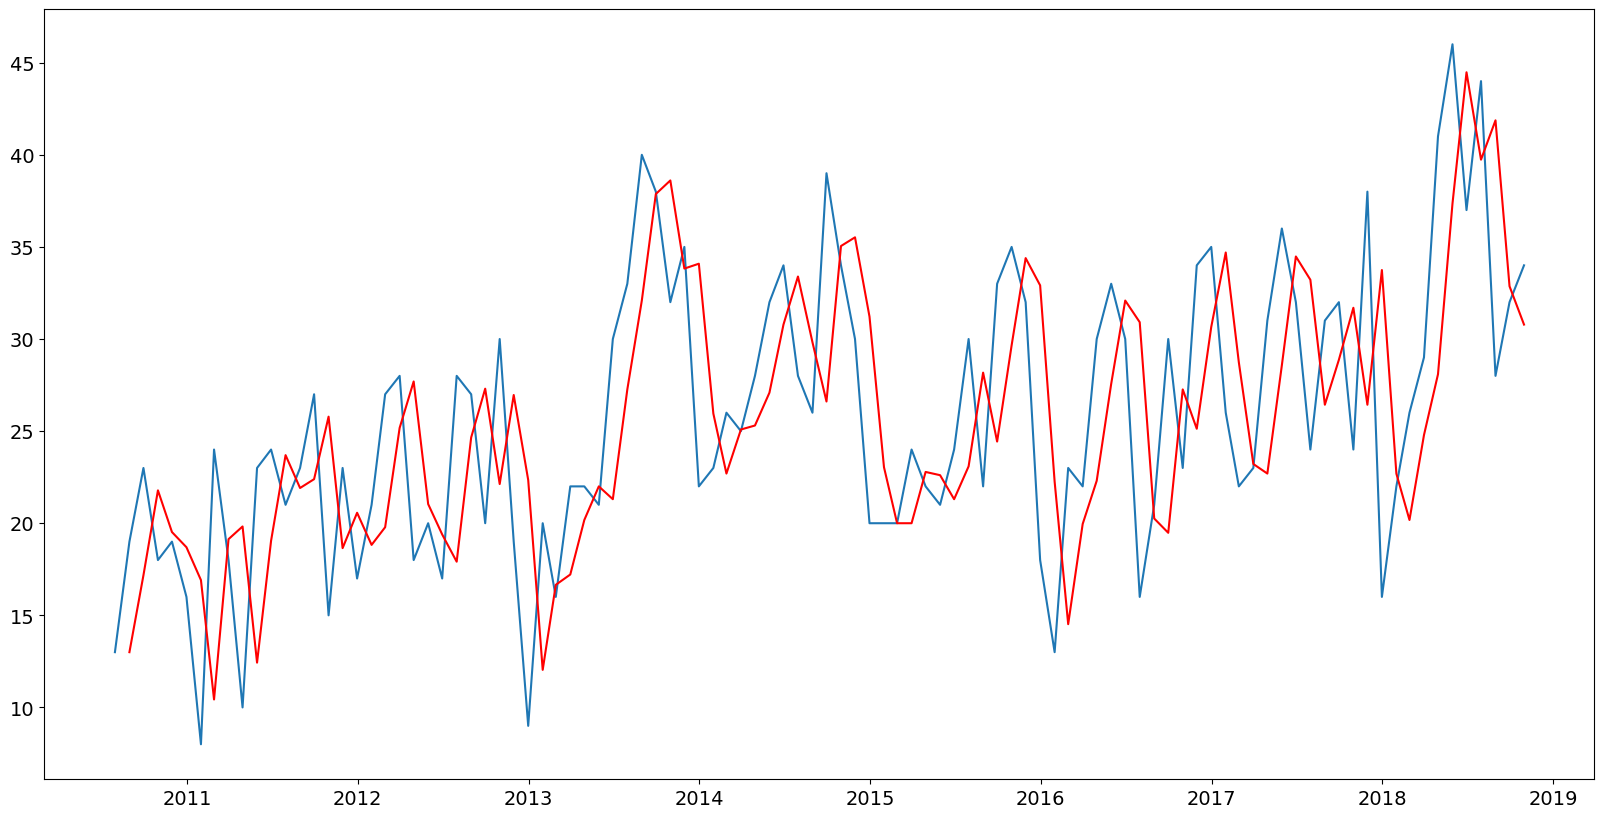

In [138]:
### Modelo 1

from statsmodels.tsa.arima.model import ARIMA
warnings.filterwarnings('ignore')

plt.figure(figsize=(20,10))

model=ARIMA(train, order=(1,1,0)) # p, d, q
results=model.fit()
plt.plot(train)

prediccion_ar1 = results.fittedvalues[1:] 

plt.plot(prediccion_ar1, color='red')
print('plotting ARIMA model')

In [139]:
### Metricas 1

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(train['No. Accidentes'][1:], prediccion_ar1)
mae = mean_absolute_error(train['No. Accidentes'][1:], prediccion_ar1)


print('MSE: '+str(mse))
print('MAE: '+str(mae))

#mse = mean_squared_error(y_true, y_pred)

MSE: 49.1711257190394
MAE: 5.748614387664524


### Modelo 2 (ARIMA):

plotting ARIMA model


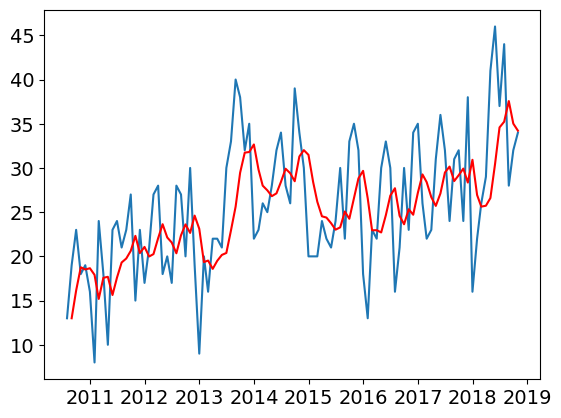

In [140]:
### Modelo 2

model=ARIMA(train, order=(0,1,1)) # p, d, q
results=model.fit()
plt.plot(train)

prediccion_ma1 = results.fittedvalues[1:]

plt.plot(prediccion_ma1, color='red')
print('plotting ARIMA model')

In [141]:
### Metricas 2
mse = mean_squared_error(train['No. Accidentes'][1:], prediccion_ma1)
mae = mean_absolute_error(train['No. Accidentes'][1:], prediccion_ma1)


print('MSE: '+str(mse))
print('MAE: '+str(mae))

#mse = mean_squared_error(y_true, y_pred)

MSE: 45.06612005219589
MAE: 5.5183424729986195


### Modelo 3 (ARIMA):

plotting ARIMA model


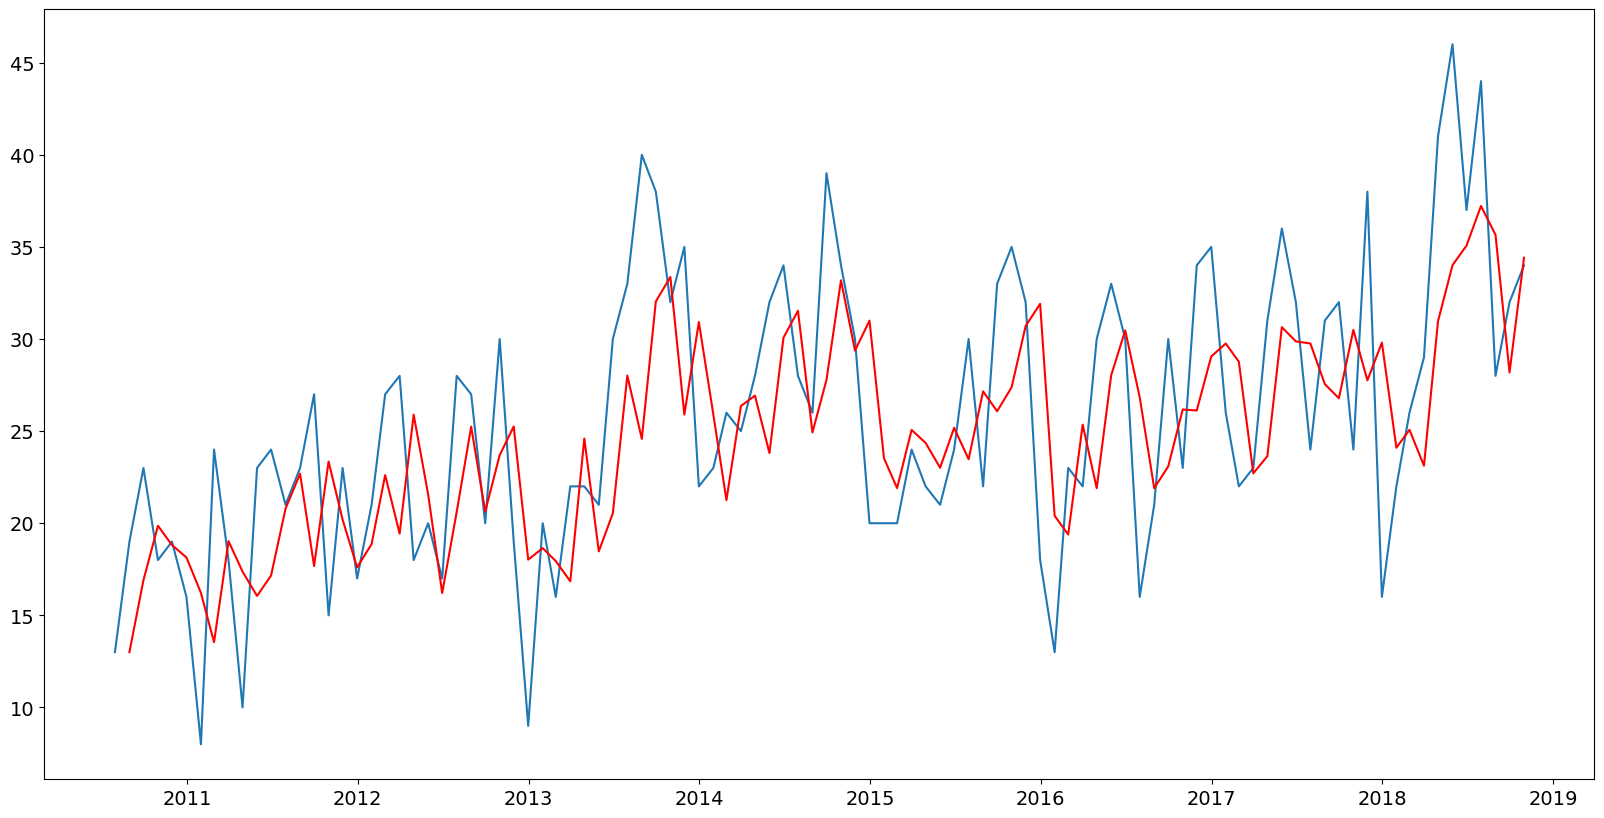

In [142]:
### Modelo 3:
plt.figure(figsize=(20,10))

model=ARIMA(train, order=(3,1,3)) # p, d, q
results=model.fit()
plt.plot(train)

prediccion_arima =  results.fittedvalues[1:]

plt.plot(prediccion_arima, color='red')
print('plotting ARIMA model')

In [143]:
### Metricas 3
mse = mean_squared_error(train['No. Accidentes'][1:], prediccion_arima)
mae = mean_absolute_error(train['No. Accidentes'][1:], prediccion_arima)


print('MSE: '+str(mse))
print('MAE: '+str(mae))

#mse = mean_squared_error(y_true, y_pred)

MSE: 37.73835008742854
MAE: 4.988512607239234


### Modelo 4 (ARIMA):

plotting ARIMA model


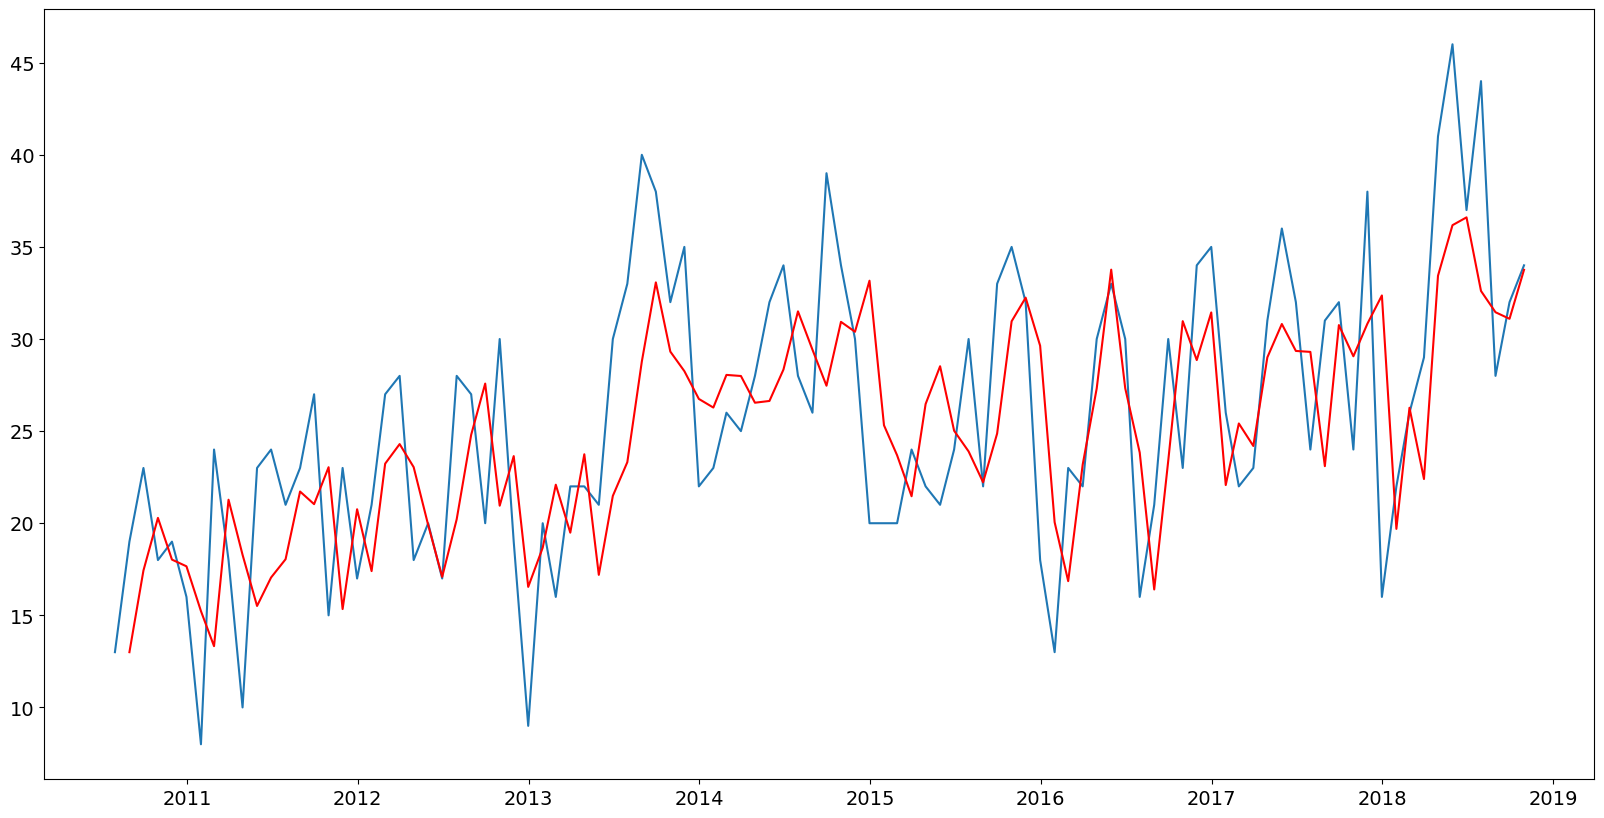

In [144]:
### Modelo 4:
plt.figure(figsize=(20,10))

model=ARIMA(train, order=(5,1,5)) # p, d, q
results=model.fit()
plt.plot(train)

prediccion_arima =  results.fittedvalues[1:]

plt.plot(prediccion_arima, color='red')
print('plotting ARIMA model')

In [145]:
### Metricas 4:
mse = mean_squared_error(train['No. Accidentes'][1:], prediccion_arima)
mae = mean_absolute_error(train['No. Accidentes'][1:], prediccion_arima)


print('MSE: '+str(mse))
print('MAE: '+str(mae))

#mse = mean_squared_error(y_true, y_pred)

MSE: 34.36939781661981
MAE: 4.853967426563628


### Modelo 5 (ARIMA):

plotting ARIMA model


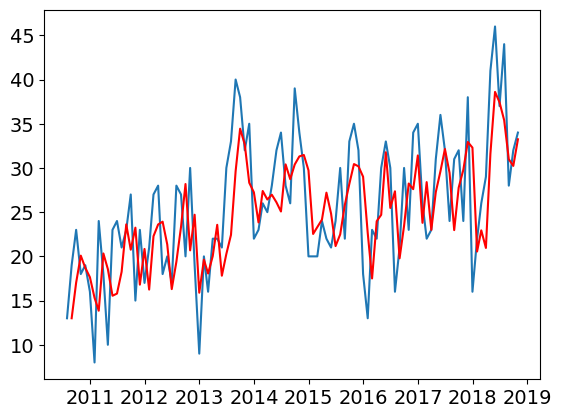

In [146]:
### Modelo 5:

model=ARIMA(train, order=(7,1,7)) # p, d, q
results=model.fit()
plt.plot(train)

prediccion_arima =  results.fittedvalues[1:]

plt.plot(prediccion_arima, color='red')
print('plotting ARIMA model')

In [147]:
### Metricas 5:
mse = mean_squared_error(train['No. Accidentes'][1:], prediccion_arima)
mae = mean_absolute_error(train['No. Accidentes'][1:], prediccion_arima)


print('MSE: '+str(mse))
print('MAE: '+str(mae))

#mse = mean_squared_error(y_true, y_pred)

MSE: 33.7502200010534
MAE: 4.81573321759115


### Modelo 6 (SARIMA):

plotting ARIMA model


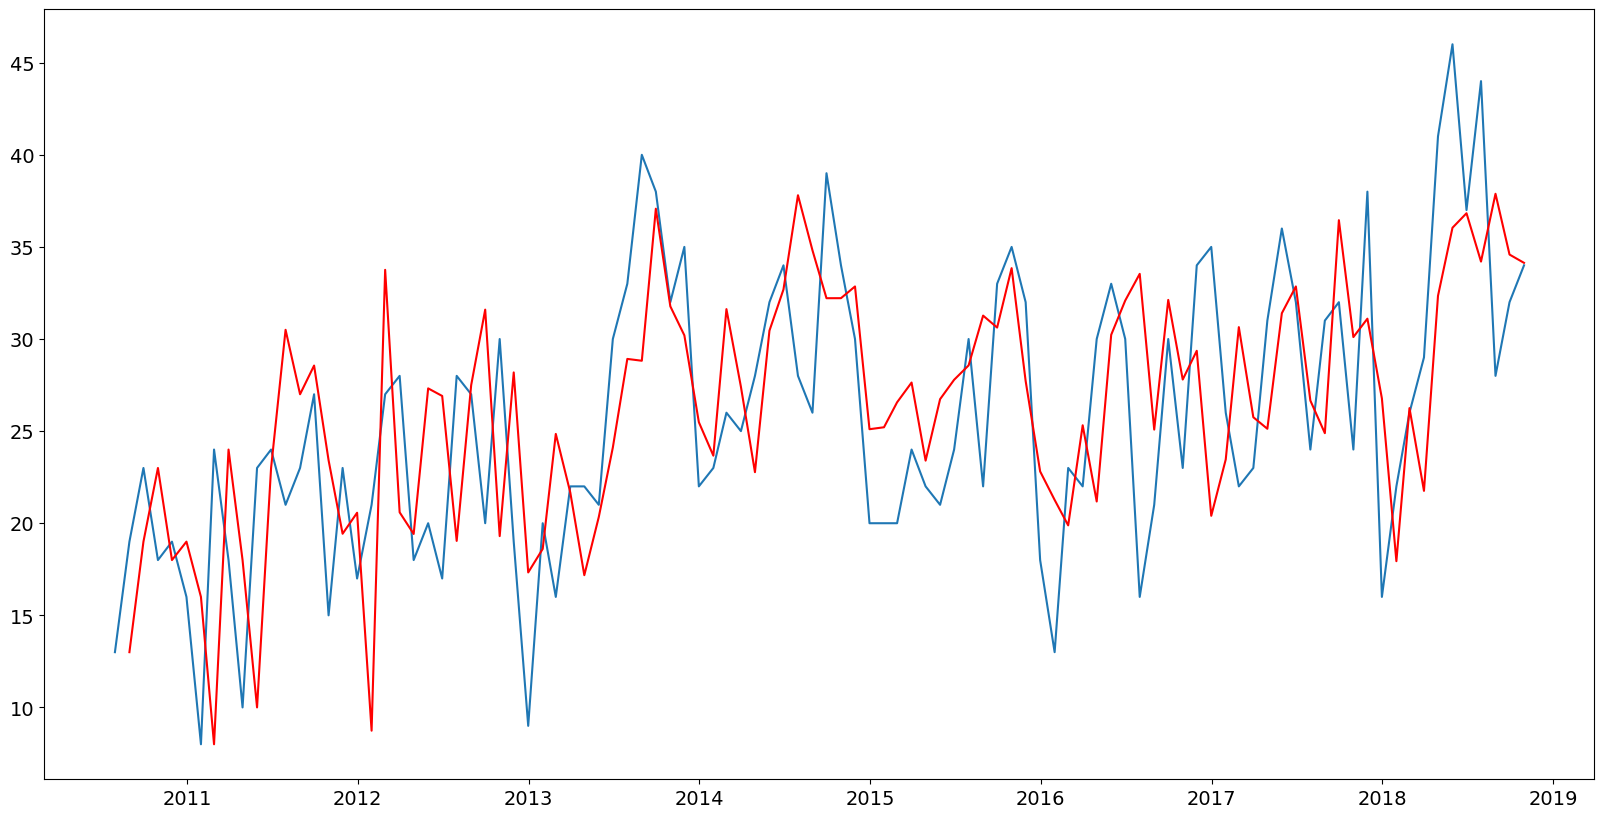

In [148]:
### Modelo 6:
plt.figure(figsize=(20,10))

model=ARIMA(train, order=(3,1,3), seasonal_order=(3, 1, 2, 12) ) #


results=model.fit()
plt.plot(train)

prediccion_sarima = results.fittedvalues[1:]

plt.plot(prediccion_sarima, color='red')
print('plotting ARIMA model')

In [149]:
### Metricas 6:
mse = mean_squared_error(train['No. Accidentes'][1:], prediccion_sarima)
mae = mean_absolute_error(train['No. Accidentes'][1:], prediccion_sarima)



print('MSE: '+str(mse))
print('MAE: '+str(mae))

#mse = mean_squared_error(y_true, y_pred)

MSE: 43.4452809541173
MAE: 5.407481430453908


### Modelo 7 (SARIMA):

plotting ARIMA model


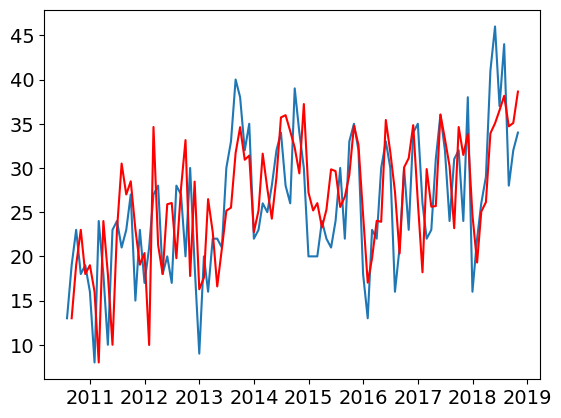

In [150]:
### Modelo 7:

model=ARIMA(train, order=(5,1,7), seasonal_order=(5, 1, 2, 12) ) #


results=model.fit()
plt.plot(train)

prediccion_sarima = results.fittedvalues[1:]

plt.plot(prediccion_sarima, color='red')
print('plotting ARIMA model')

In [151]:
### Metricas 7:
mse = mean_squared_error(train['No. Accidentes'][1:], prediccion_sarima)
mae = mean_absolute_error(train['No. Accidentes'][1:], prediccion_sarima)



print('MSE: '+str(mse))
print('MAE: '+str(mae))

#mse = mean_squared_error(y_true, y_pred)

MSE: 38.2649657562298
MAE: 5.140032760828383


### Modelo 8 (SARIMA):

plotting ARIMA model


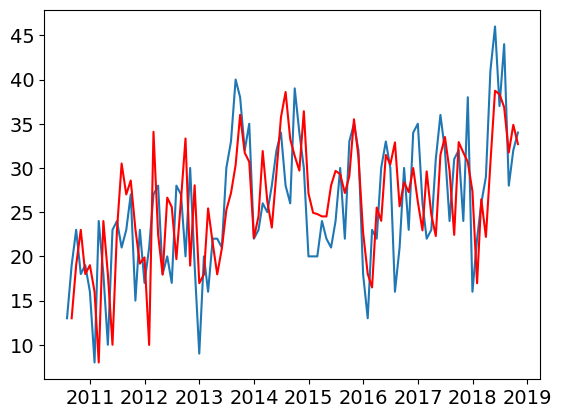

In [152]:
### Modelo 8:

model=ARIMA(train, order=(7,1,7), seasonal_order=(3, 1, 2, 12) ) #


results=model.fit()
plt.plot(train)

prediccion_sarima = results.fittedvalues[1:]

plt.plot(prediccion_sarima, color='red')
print('plotting ARIMA model')

In [153]:
### Metricas 8:
mse = mean_squared_error(train['No. Accidentes'][1:], prediccion_sarima)
mae = mean_absolute_error(train['No. Accidentes'][1:], prediccion_sarima)



print('MSE: '+str(mse))
print('MAE: '+str(mae))

#mse = mean_squared_error(y_true, y_pred)

MSE: 40.05814536077924
MAE: 5.1895031724029534


### Mejor modelo y sus métricas:

MODELO 5 ARIMA
MSE: 33.7502200010534
MAE: 4.81573321759115


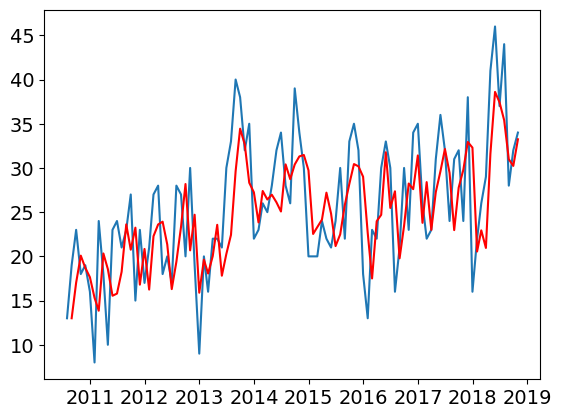

In [154]:
### Método 5:

model=ARIMA(train, order=(7,1,7)) # p, d, q
results=model.fit()
plt.plot(train)

prediccion_arima =  results.fittedvalues[1:]

plt.plot(prediccion_arima, color='red')
print('MODELO 5 ARIMA')

### Metricas 5:
mse = mean_squared_error(train['No. Accidentes'][1:], prediccion_arima)
mae = mean_absolute_error(train['No. Accidentes'][1:], prediccion_arima)


print('MSE: '+str(mse))
print('MAE: '+str(mae))

#mse = mean_squared_error(y_true, y_pred)


In [155]:
#### Hiperparámetros elegidos
p_fin = 7
d_fin = 1
q_fin = 7

#P_fin = 0
#D_fin = 0
#Q_fin = 0
#S_fin = 0

## 5. EVALUACIÓN:

In [156]:
residuos = results.resid[1:] ### Residuos del modelo

### Ruido blanco:

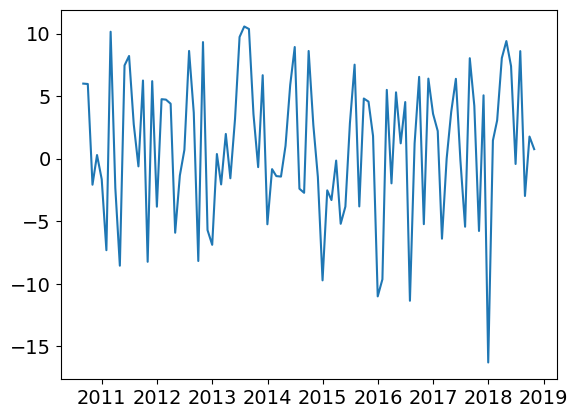

In [157]:
plt.plot(residuos)

### Promedio de residuos:

In [158]:
np.mean(residuos)

1.0213994630855563

In [159]:
import statsmodels.api as sm
sm.stats.acorr_ljungbox(results.resid, lags=[5], return_df=True)

,lb_stat,lb_pvalue
5,1.534913,0.909006


## 6. PREDICCIÓN A FUTURO:

In [160]:
history = list(train.values.copy())
predictions = list()
for t in range(len(test)):
	model =  ARIMA(history, order=(p_fin, d_fin, q_fin), seasonal_order=(P_fin, D_fin, Q_fin, S_fin) )
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test.values[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
    
# Métricas en prueba
mae = mean_absolute_error(test, predictions)
print('Test MAE: %.3f' % mae)
mse = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % mse)

predicted=39.868552, expected=36.000000
predicted=26.044913, expected=18.000000
predicted=20.539633, expected=21.000000
predicted=25.027548, expected=21.000000
predicted=24.508675, expected=28.000000
predicted=39.064421, expected=39.000000
predicted=43.157920, expected=32.000000
predicted=34.251389, expected=49.000000
predicted=35.548934, expected=30.000000
predicted=26.989293, expected=31.000000
predicted=39.272694, expected=35.000000
predicted=30.277833, expected=44.000000
Test MAE: 6.118
Test MSE: 58.647


In [161]:
## Predicciones Multi-step ahead 
history = list(train.values.copy())
predictions = list()

model =  ARIMA(history, order=(p_fin, d_fin, q_fin), seasonal_order=(P_fin, D_fin, Q_fin, S_fin) )
model_fit = model.fit()
output = model_fit.forecast(len(test))   
yhat = output
predictions = yhat

mae = mean_absolute_error(test, predictions)
print('Test MAE: %.3f' % mae)
mse = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % mse)

Test MAE: 6.554
Test MSE: 60.882


### Se define realizar una prediccón de 2 años:

In [162]:
### Modelo entrenado con todos los datos
model =  ARIMA(data, order=(p_fin, d_fin, q_fin), seasonal_order=(P_fin, D_fin, Q_fin, S_fin) ) #

results=model.fit()
prediccion_sarima = results.fittedvalues[1:]

In [163]:
### Predecir 24 pasos (meses) a futuro
x=results.get_forecast(steps=24)


x_pred= x.predicted_mean
pd.DataFrame(x_pred)

,predicted_mean
2019-11-30,38.555769
2019-12-31,35.885043
2020-01-31,26.160769
2020-02-29,28.784896
2020-03-31,30.730252
2020-04-30,39.168383
2020-05-31,38.074500
2020-06-30,45.289069
2020-07-31,33.431844
2020-08-31,32.671668


In [164]:
### Y su intervalo de confianza es
x_ci = x.conf_int()
x_ci.head()

,lower No. Accidentes,upper No. Accidentes
2019-11-30,27.361301,49.750236
2019-12-31,23.910528,47.859557
2020-01-31,13.513471,38.808066
2020-02-29,15.728994,41.840797
2020-03-31,17.634970,43.825534


### Gráfica que describe la prediccion a futuro del modelo:

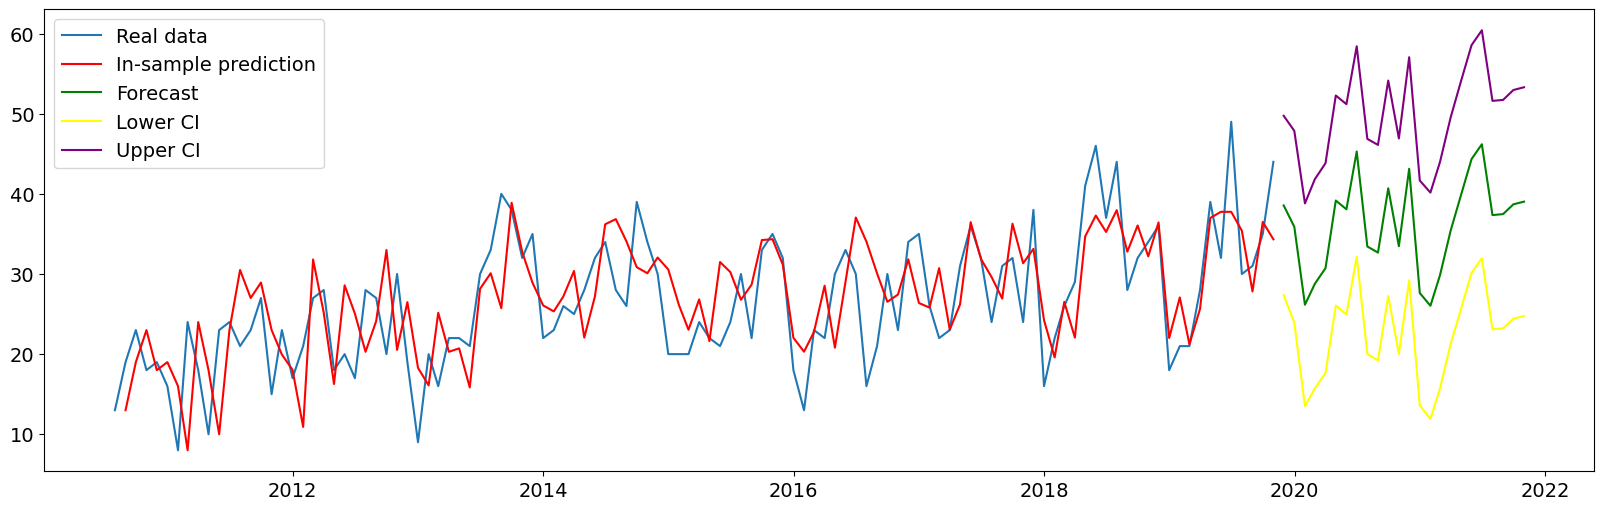

In [165]:
plt.figure(figsize=(20,6))

plt.plot(data, label='Real data')

prediccion_sarima = results.fittedvalues[1:]

plt.plot(prediccion_sarima, color='red', label='In-sample prediction')

plt.plot(x_pred, color='green', label='Forecast')
plt.plot(x_ci['lower No. Accidentes'], color='yellow', label='Lower CI')
plt.plot(x_ci['upper No. Accidentes'], color='purple', label='Upper CI')

plt.legend()
